In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve)
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

In [3]:
df = pd.read_csv("data/glass.csv")

In [4]:
df.shape

(214, 10)

In [6]:
# Detect observations with more than one outlier
from collections import Counter
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

In [7]:
features = df.columns[:-1].tolist()
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))

The dataset contains 14 observations with more than 2 outliers


In [8]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


In [10]:
X = df.drop("Type", axis = 1)
y = df["Type"]

In [11]:
X.shape

(200, 9)

In [12]:
y.shape

(200,)

In [15]:
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [16]:
X_train.shape

(160, 9)

In [17]:
X_test.shape

(40, 9)

Elapsed time to train XGBoost  0.109 seconds


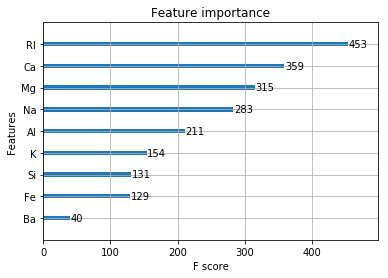

In [21]:
xgb = XGBClassifier()
start = time()
xgb.fit(X_train, y_train)
print('Elapsed time to train XGBoost  %.3f seconds' %(time()-start))
plot_importance(xgb)
plt.show()